# Load data

In [21]:
import os
import pandas as pd
from display_utils import *

data_path = "../data/results"
bart_ft_res = pd.read_csv(os.path.join(data_path,"bart-ft-results.csv"))
llama_ft_res = pd.read_csv(os.path.join(data_path,"llama-ft-results.csv"))
llama_instr_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-results.csv"))
llama_instr_prompt_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-prompt-results.csv"))

In [15]:
bart_ft_res.columns

Index(['dataset', 'base-b1', 'base-b2', 'masked-b1', 'masked-b2', 'subject-b1',
       'subject-b2', 'target-phrase-b1', 'target-phrase-b2', 'target-sent-b1',
       'target-sent-b2', 'target-sent-target-b1', 'target-sent-target-b2',
       'target-sent-subject-b1', 'target-sent-subject-b2', 'base-bsprec',
       'masked-bsprec', 'subject-bsprec', 'target-phrase-bsprec',
       'target-sent-bsprec', 'target-sent-target-bsprec',
       'target-sent-subject-bsprec', 'base-bsrec', 'masked-bsrec',
       'subject-bsrec', 'target-phrase-bsrec', 'target-sent-bsrec',
       'target-sent-target-bsrec', 'target-sent-subject-bsrec', 'base-bsf1',
       'masked-bsf1', 'subject-bsf1', 'target-phrase-bsf1', 'target-sent-bsf1',
       'target-sent-target-bsf1', 'target-sent-subject-bsf1', 'base-bartscore',
       'masked-bartscore', 'subject-bartscore', 'target-phrase-bartscore',
       'target-sent-bartscore', 'target-sent-target-bartscore',
       'target-sent-subject-bartscore'],
      dtype='obj

# Model comparison

## BLEU-1 Score

In [22]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-b1,bart-ft_masked-b1,bart-ft_subject-b1,bart-ft_target-phrase-b1,bart-ft_target-sent-b1,bart-ft_target-sent-target-b1,bart-ft_target-sent-subject-b1,llama-ft_base-b1,llama-ft_masked-b1,...,llama-ft_target-sent-b1,llama-ft_target-sent-target-b1,llama-ft_target-sent-subject-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_masked-b1,llama-instr-few-shot_subject-b1,llama-instr-few-shot_target-phrase-b1,llama-instr-few-shot_target-sent-b1,llama-instr-few-shot_target-sent-target-b1,llama-instr-few-shot_target-sent-subject-b1
0,c2s,20.127,18.792,30.405,19.096,19.105,20.562,31.640,22.070,22.447,...,21.379,22.760,29.088,15.899,15.258,22.277,18.195,16.856,16.122,23.132
1,c2sp,19.784,20.500,31.428,20.618,19.568,20.683,32.585,20.439,22.299,...,20.896,22.291,30.110,15.266,15.757,23.580,19.185,16.712,16.953,21.920
2,c4s,19.593,19.678,32.311,20.097,20.790,20.867,32.391,23.374,23.978,...,22.208,24.196,30.140,15.712,14.908,22.771,18.578,17.291,15.681,22.052
3,c4sp,18.544,20.353,30.628,21.256,19.733,21.943,32.564,20.691,21.377,...,22.612,22.533,30.210,15.233,16.923,23.323,18.362,15.930,17.230,21.453
4,cs,21.549,NaN,30.854,22.099,21.549,22.099,30.854,22.577,NaN,...,22.577,22.365,27.416,19.650,NaN,20.256,18.037,19.650,18.037,20.256


In [25]:
find_max_value(df, exclude_substrings=["subject"])

Highest score: 24.893
Dataset: c2op
Column: bart-ft_target-phrase-b1


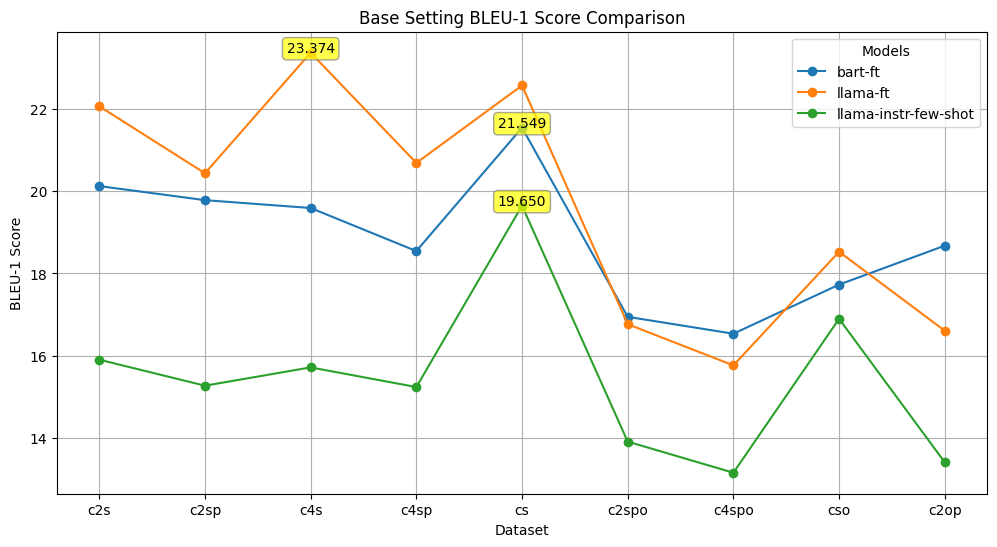

In [26]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='base-b1',
    title="Base Setting BLEU-1 Score Comparison",
)

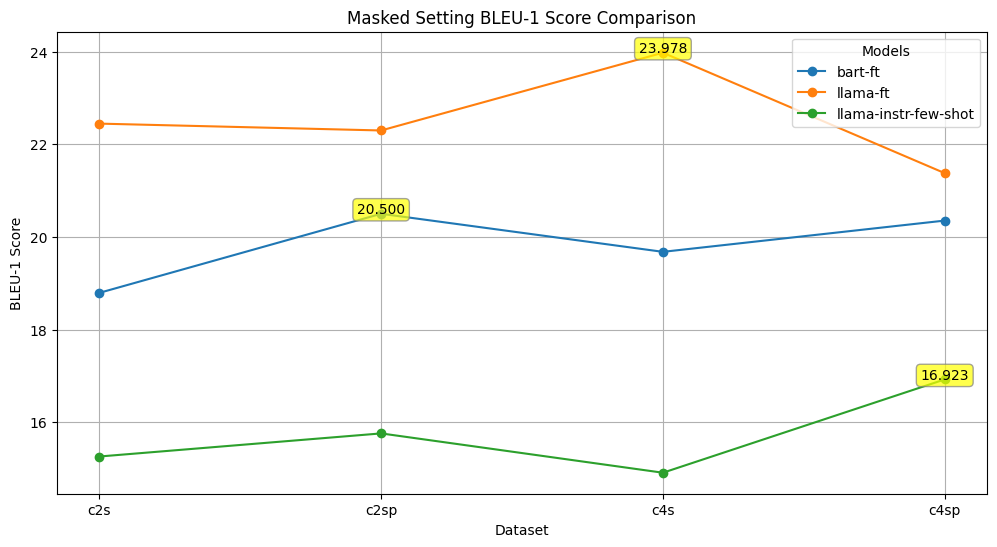

In [9]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='masked-b1',
    title="Masked Setting BLEU-1 Score Comparison"
)

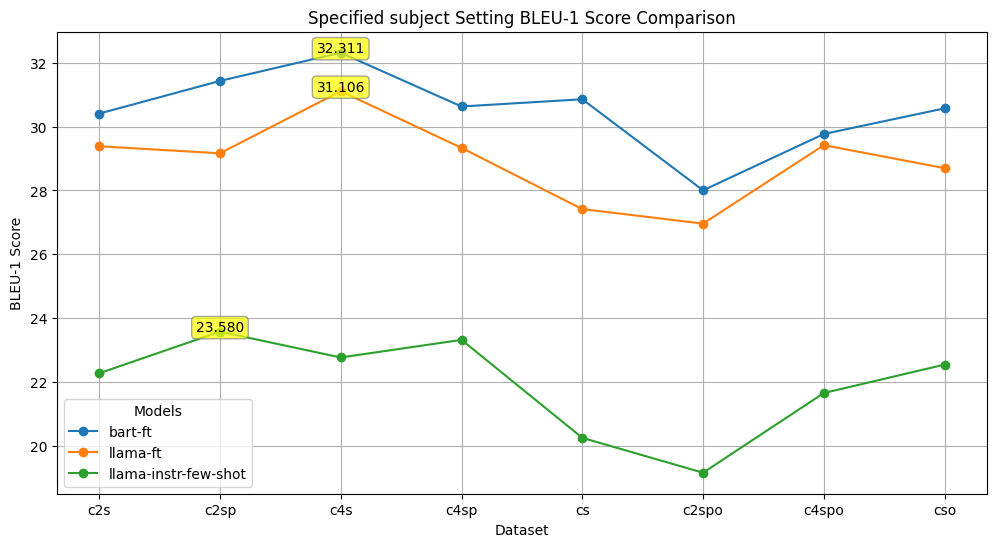

In [6]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='subject-b1',
    title="Specified subject Setting BLEU-1 Score Comparison"
)

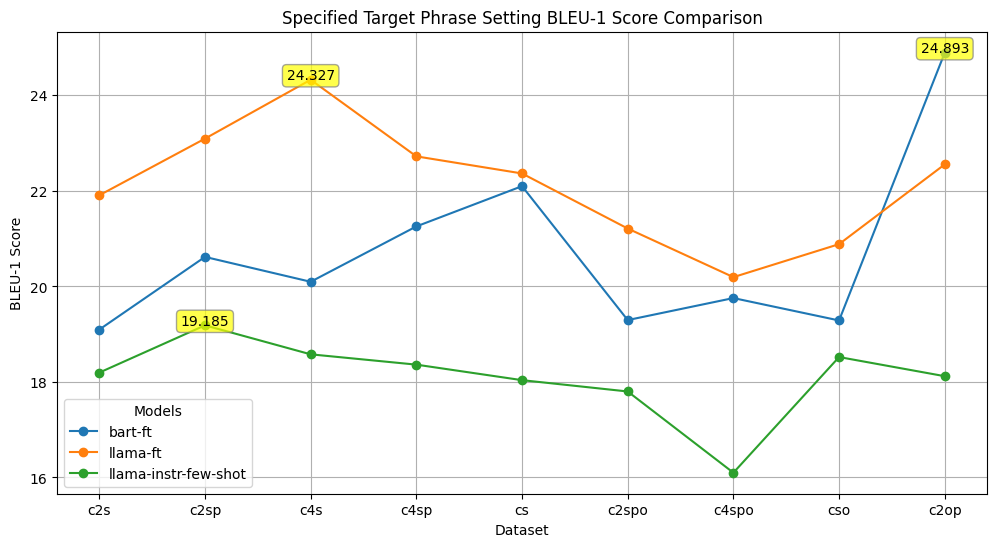

In [27]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-phrase-b1',
    title="Specified Target Phrase Setting BLEU-1 Score Comparison"
)

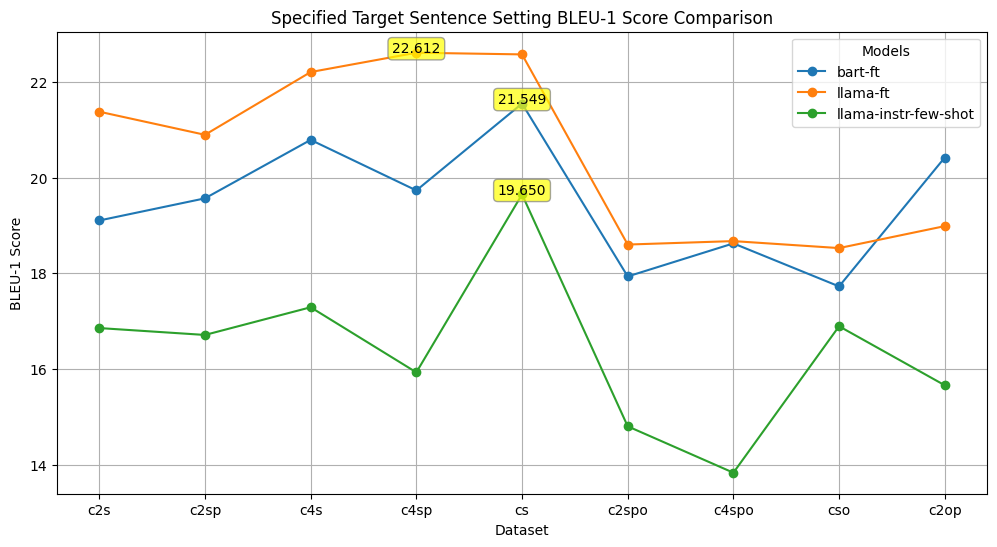

In [8]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-b1',
    title="Specified Target Sentence Setting BLEU-1 Score Comparison"
)

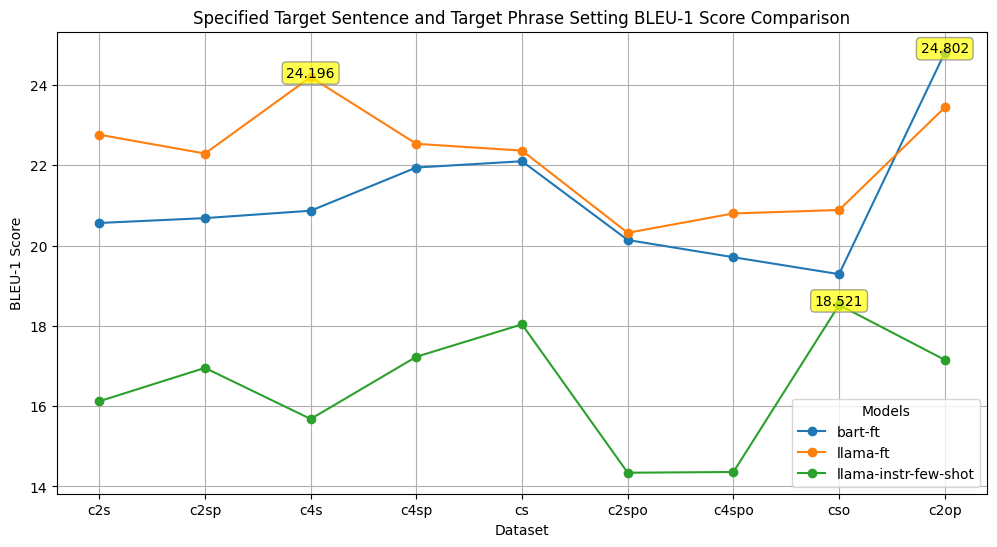

In [9]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-target-b1',
    title="Specified Target Sentence and Target Phrase Setting BLEU-1 Score Comparison"
)

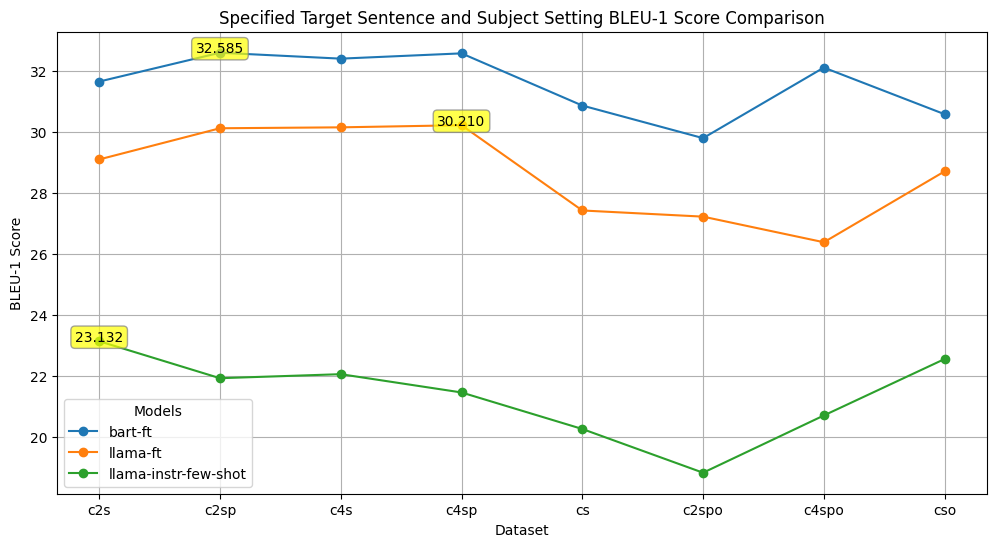

In [14]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-subject-b1',
    title="Specified Target Sentence and Subject Setting BLEU-1 Score Comparison"
)

## BLEU-2 Score

In [28]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b2", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b2", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b2","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-b2,bart-ft_masked-b2,bart-ft_subject-b2,bart-ft_target-phrase-b2,bart-ft_target-sent-b2,bart-ft_target-sent-target-b2,bart-ft_target-sent-subject-b2,llama-ft_base-b2,llama-ft_masked-b2,...,llama-ft_target-sent-b2,llama-ft_target-sent-target-b2,llama-ft_target-sent-subject-b2,llama-instr-few-shot_base-b2,llama-instr-few-shot_masked-b2,llama-instr-few-shot_subject-b2,llama-instr-few-shot_target-phrase-b2,llama-instr-few-shot_target-sent-b2,llama-instr-few-shot_target-sent-target-b2,llama-instr-few-shot_target-sent-subject-b2
0,c2s,6.451,4.865,19.002,5.077,6.143,7.324,20.938,9.862,9.638,...,8.549,9.273,14.827,3.588,3.309,8.939,6.079,3.615,4.499,9.425
1,c2sp,6.257,8.371,20.317,7.455,5.629,7.216,21.927,8.020,9.604,...,8.340,9.176,15.480,3.515,3.567,9.417,6.854,4.987,5.161,8.443
2,c4s,6.638,6.381,20.601,7.241,7.610,7.871,21.728,9.504,9.615,...,8.827,10.933,15.763,2.912,4.157,8.681,6.854,4.807,4.593,8.871
3,c4sp,6.585,7.890,19.846,8.951,6.390,9.317,21.634,8.296,8.435,...,9.351,8.659,15.876,1.652,4.930,9.918,4.900,3.877,4.798,8.484
4,cs,10.119,NaN,19.994,10.541,10.119,10.541,19.994,9.762,NaN,...,9.762,9.619,14.308,6.692,NaN,8.236,5.936,6.692,5.936,8.236


In [29]:
find_max_value(df,exclude_substrings=["subject"])

Highest score: 13.716
Dataset: c2op
Column: bart-ft_target-phrase-b2


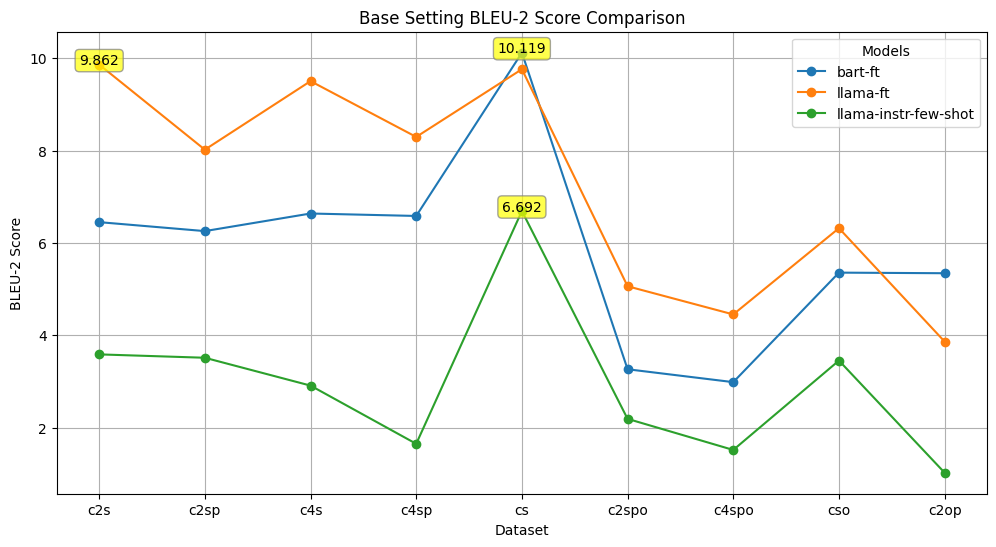

In [30]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='base-b2',
    title="Base Setting BLEU-2 Score Comparison"
)

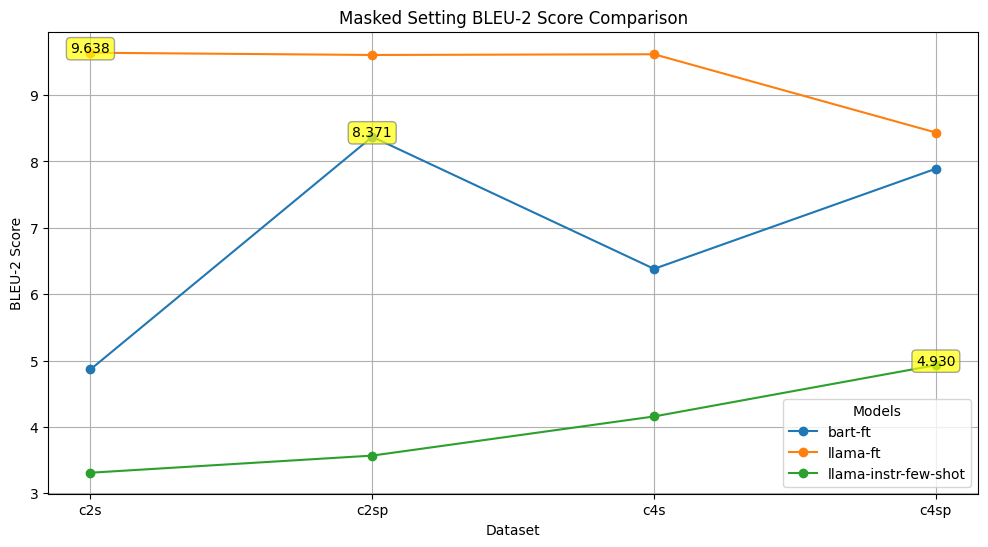

In [13]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='masked-b2',
    title="Masked Setting BLEU-2 Score Comparison"
)

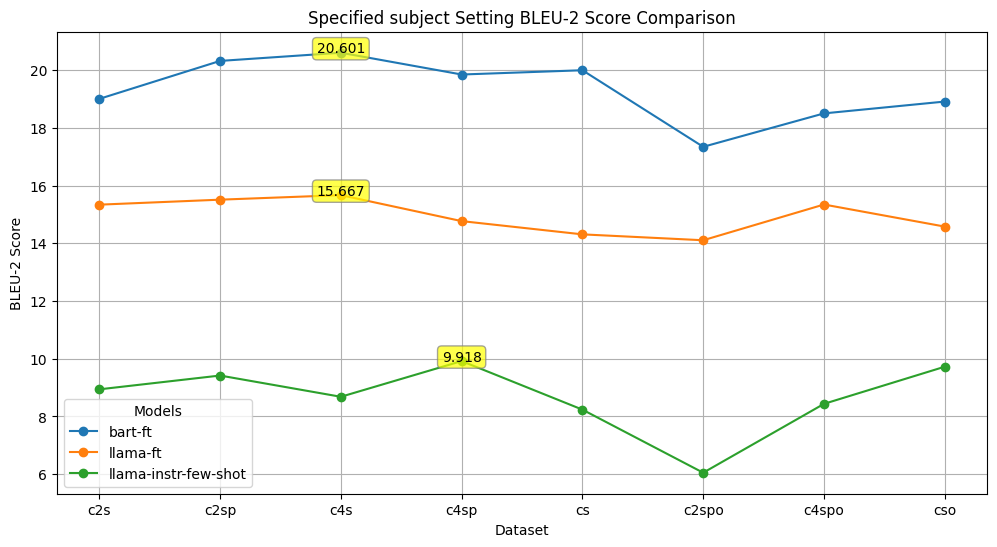

In [14]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='subject-b2',
    title="Specified subject Setting BLEU-2 Score Comparison"
)

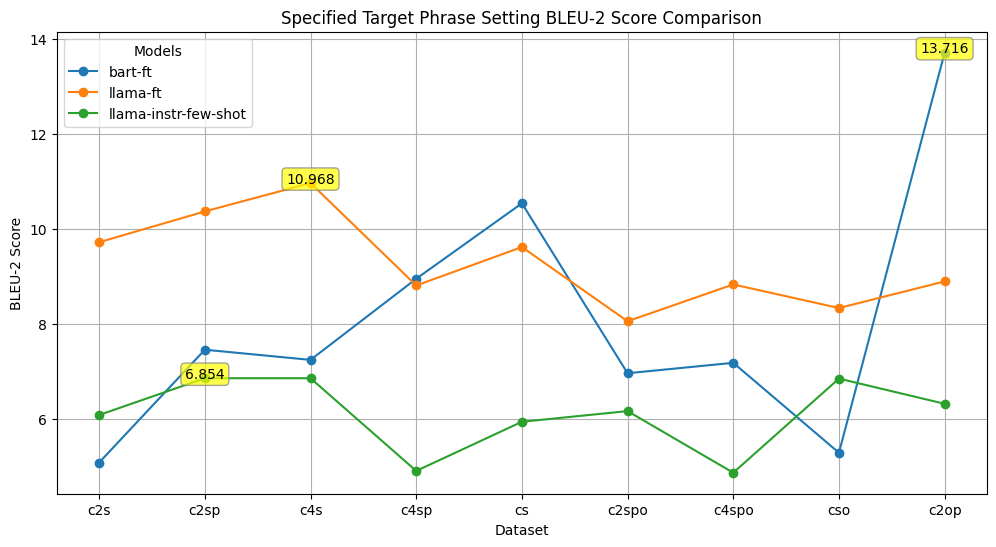

In [15]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-phrase-b2',
    title="Specified Target Phrase Setting BLEU-2 Score Comparison"
)

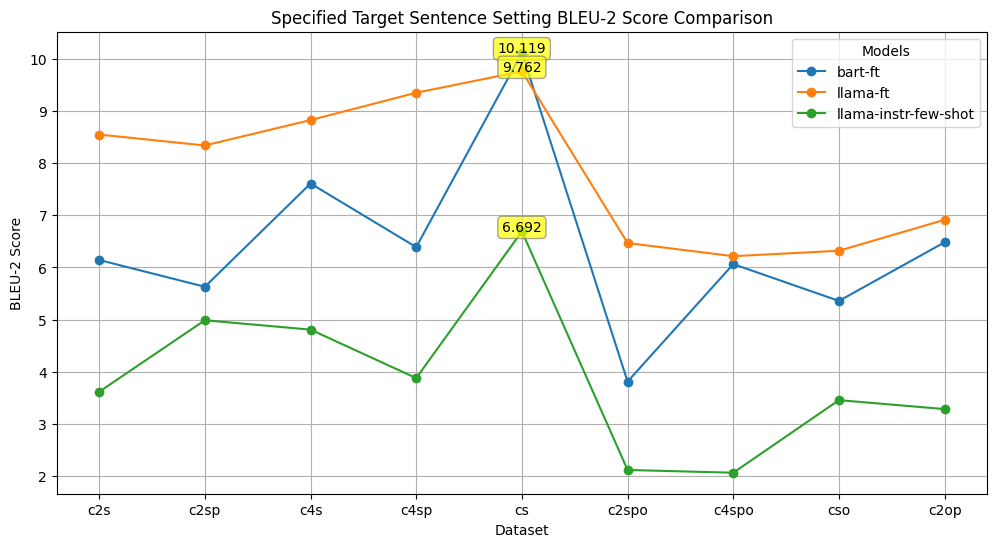

In [16]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-b2',
    title="Specified Target Sentence Setting BLEU-2 Score Comparison"
)

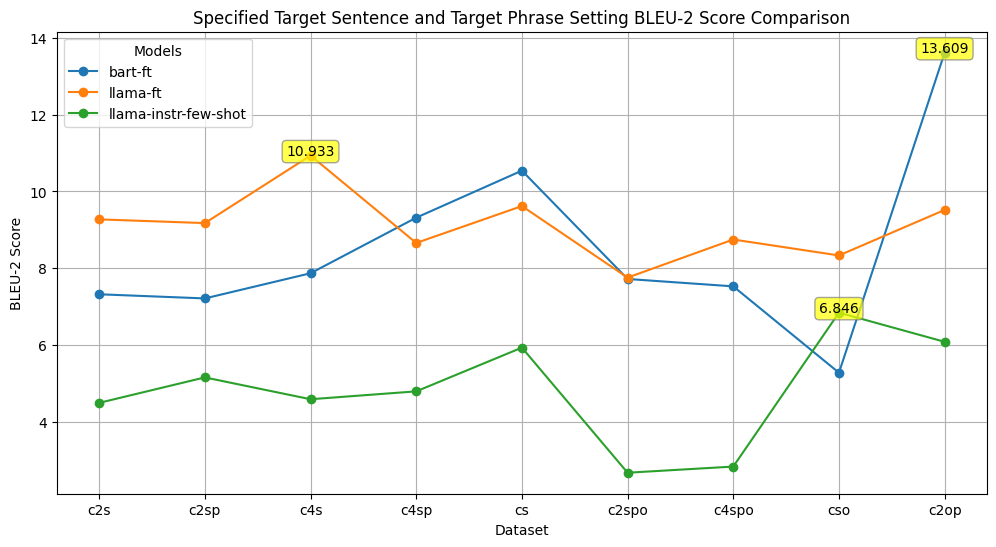

In [17]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-target-b2',
    title="Specified Target Sentence and Target Phrase Setting BLEU-2 Score Comparison"
)

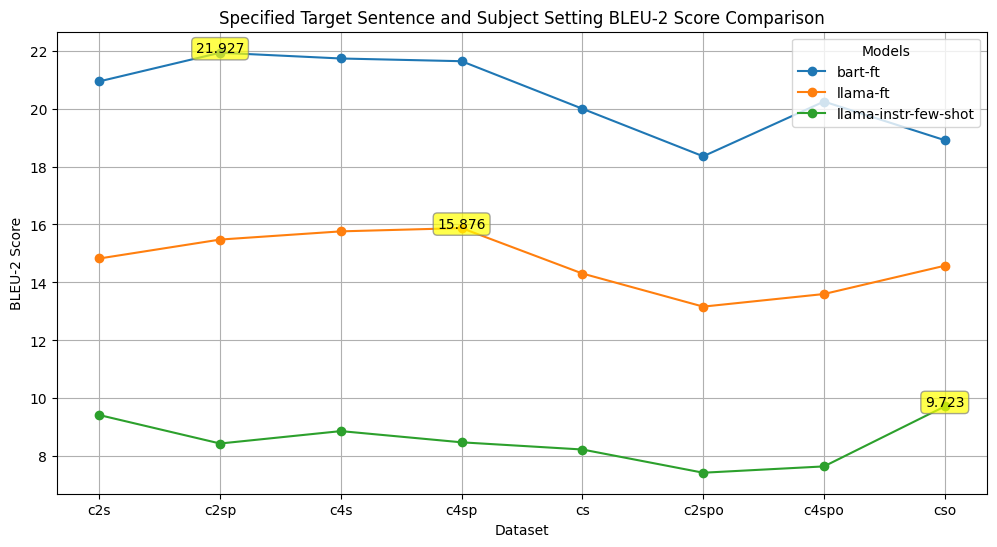

In [23]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-subject-b2',
    title="Specified Target Sentence and Subject Setting BLEU-2 Score Comparison"
)

## BERTScore

In [31]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bsf1,bart-ft_masked-bsf1,bart-ft_subject-bsf1,bart-ft_target-phrase-bsf1,bart-ft_target-sent-bsf1,bart-ft_target-sent-target-bsf1,bart-ft_target-sent-subject-bsf1,llama-ft_base-bsf1,llama-ft_masked-bsf1,...,llama-ft_target-sent-bsf1,llama-ft_target-sent-target-bsf1,llama-ft_target-sent-subject-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_masked-bsf1,llama-instr-few-shot_subject-bsf1,llama-instr-few-shot_target-phrase-bsf1,llama-instr-few-shot_target-sent-bsf1,llama-instr-few-shot_target-sent-target-bsf1,llama-instr-few-shot_target-sent-subject-bsf1
0,c2s,0.468,0.461,0.559,0.482,0.470,0.494,0.574,0.501,0.503,...,0.495,0.505,0.550,0.475,0.462,0.510,0.491,0.483,0.483,0.521
1,c2sp,0.487,0.489,0.566,0.497,0.480,0.492,0.574,0.482,0.507,...,0.495,0.509,0.558,0.456,0.466,0.515,0.498,0.483,0.498,0.515
2,c4s,0.470,0.471,0.573,0.486,0.490,0.492,0.572,0.499,0.500,...,0.500,0.507,0.556,0.461,0.469,0.513,0.496,0.486,0.488,0.518
3,c4sp,0.470,0.491,0.566,0.514,0.492,0.517,0.568,0.479,0.493,...,0.499,0.510,0.564,0.447,0.456,0.520,0.499,0.484,0.493,0.517
4,cs,0.496,NaN,0.567,0.502,0.496,0.502,0.567,0.502,NaN,...,0.502,0.503,0.549,0.487,NaN,0.518,0.481,0.487,0.481,0.518


In [32]:
find_max_value(df,exclude_substrings=["subject"])

Highest score: 0.537
Dataset: c2op
Column: bart-ft_target-phrase-bsf1


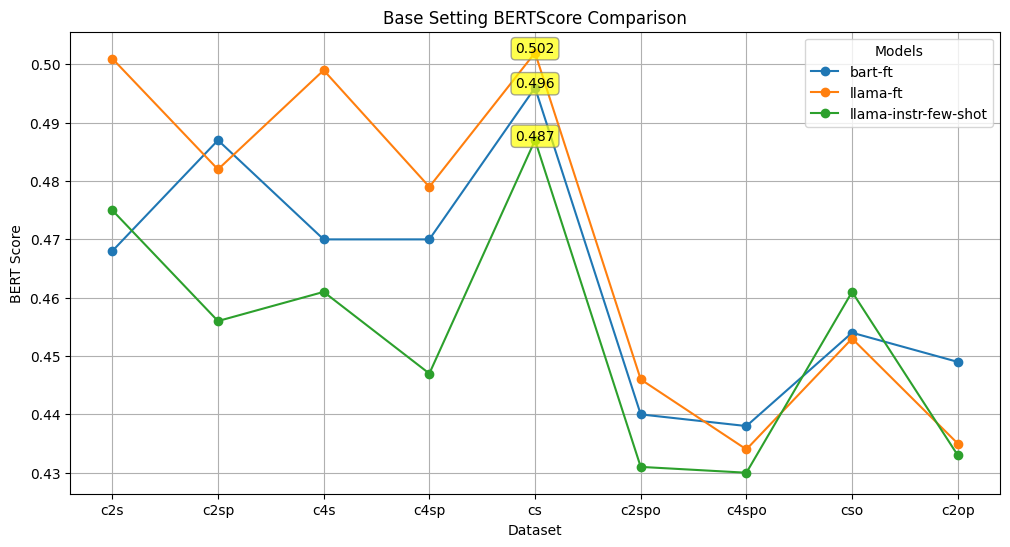

In [33]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='base-bsf1',
    title="Base Setting BERTScore Comparison"
)

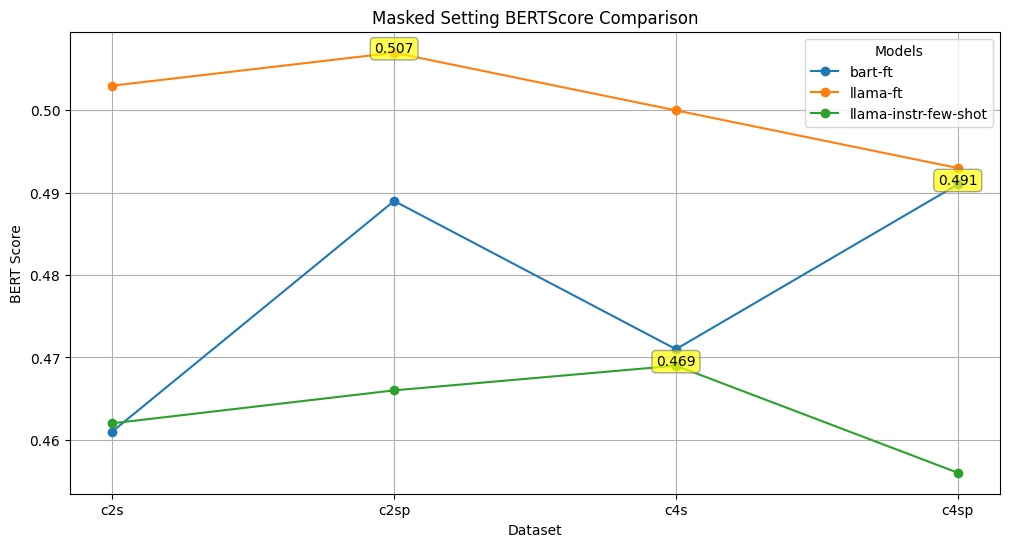

In [36]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='masked-bsf1',
    title="Masked Setting BERTScore Comparison"
)

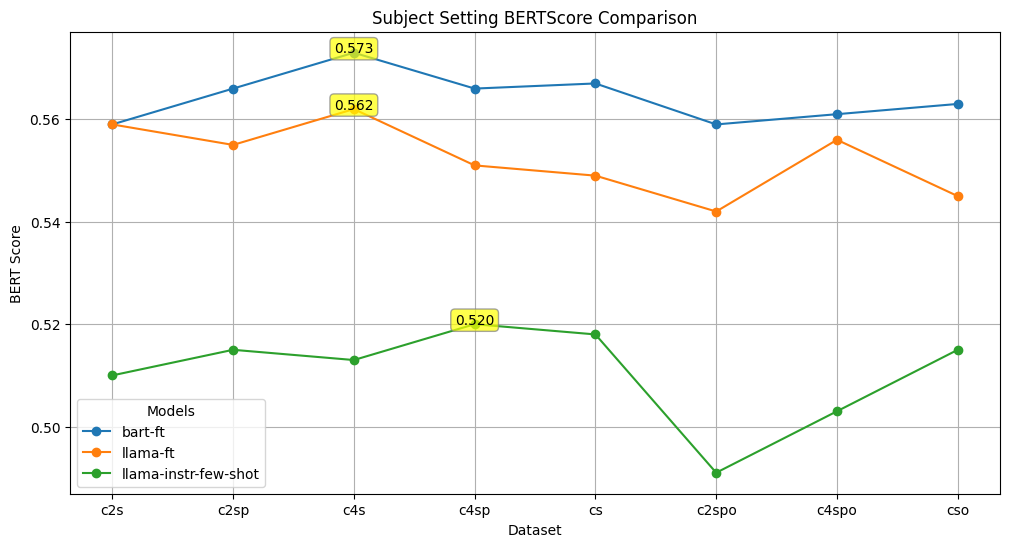

In [37]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='subject-bsf1',
    title="Subject Setting BERTScore Comparison"
)

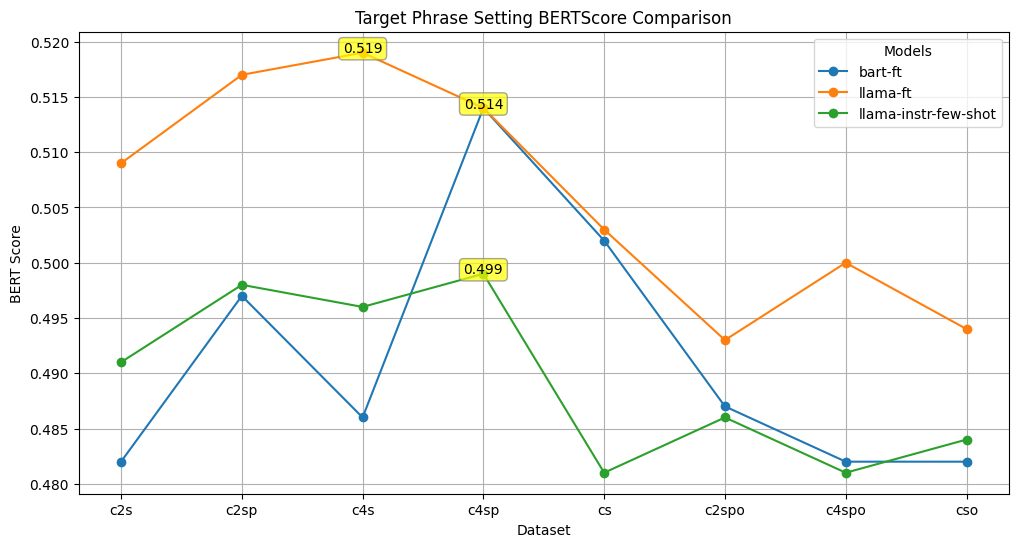

In [10]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-phrase-bsf1',
    title="Target Phrase Setting BERTScore Comparison"
)

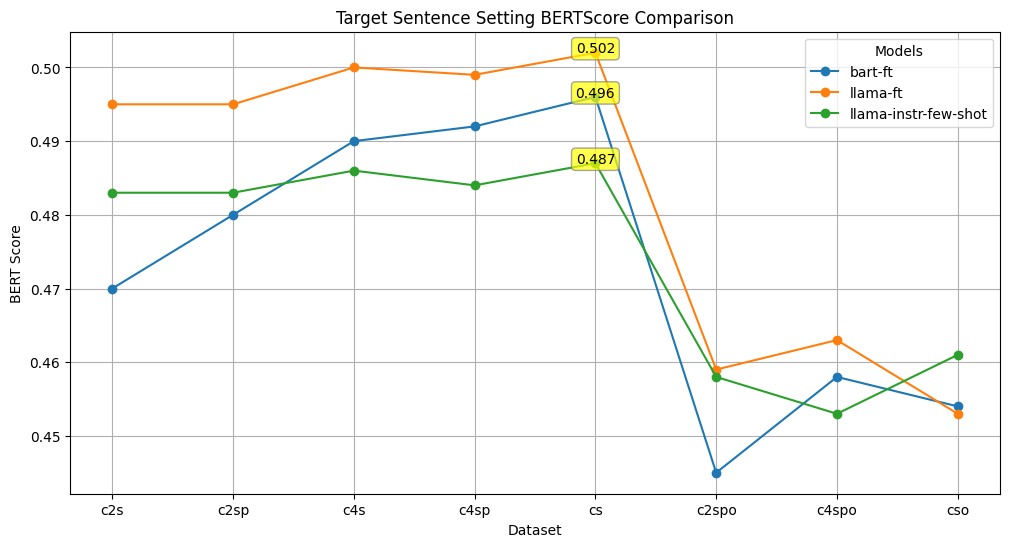

In [11]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-bsf1',
    title="Target Sentence Setting BERTScore Comparison"
)

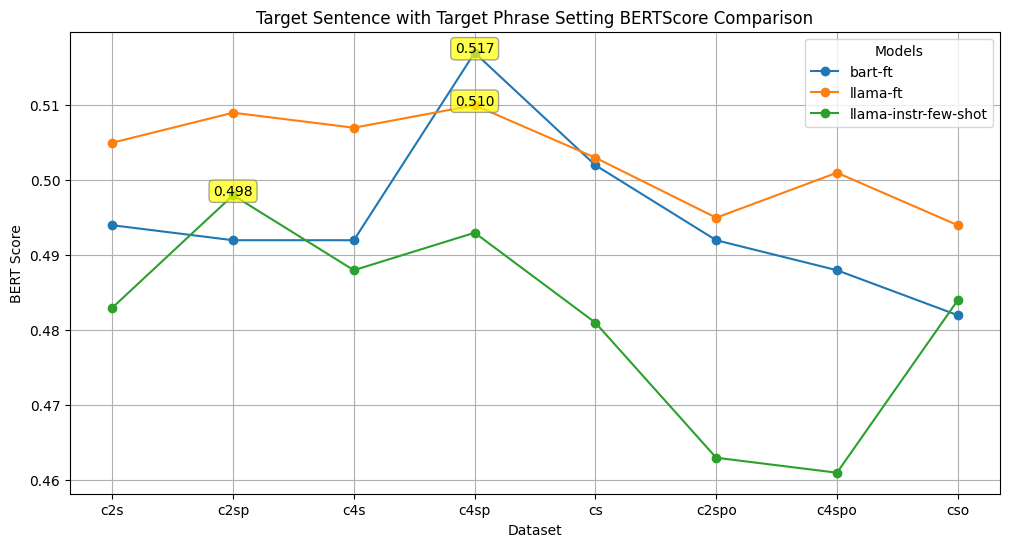

In [12]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-target-bsf1',
    title="Target Sentence with Target Phrase Setting BERTScore Comparison"
)

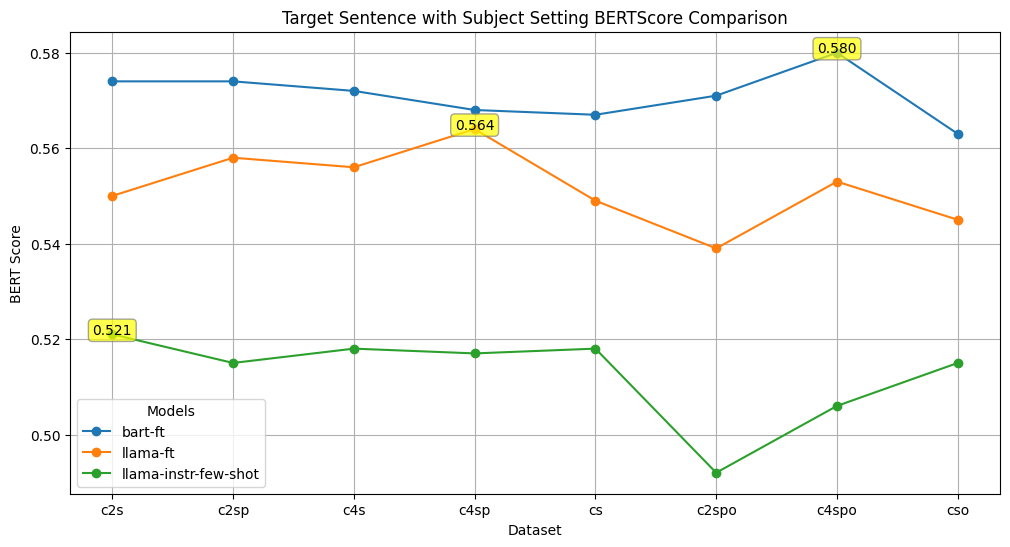

In [41]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-subject-bsf1',
    title="Target Sentence with Subject Setting BERTScore Comparison"
)

## BARTScore
https://huggingface.co/posts/santiviquez/809039256258115

In [34]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bartscore,bart-ft_masked-bartscore,bart-ft_subject-bartscore,bart-ft_target-phrase-bartscore,bart-ft_target-sent-bartscore,bart-ft_target-sent-target-bartscore,bart-ft_target-sent-subject-bartscore,llama-ft_base-bartscore,llama-ft_masked-bartscore,...,llama-ft_target-sent-bartscore,llama-ft_target-sent-target-bartscore,llama-ft_target-sent-subject-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_masked-bartscore,llama-instr-few-shot_subject-bartscore,llama-instr-few-shot_target-phrase-bartscore,llama-instr-few-shot_target-sent-bartscore,llama-instr-few-shot_target-sent-target-bartscore,llama-instr-few-shot_target-sent-subject-bartscore
0,c2s,-3.438,-3.465,-2.954,-3.328,-3.356,-3.279,-2.912,-3.328,-3.340,...,-3.358,-3.281,-3.025,-3.778,-3.809,-3.487,-3.470,-3.564,-3.619,-3.293
1,c2sp,-3.406,-3.396,-2.930,-3.317,-3.403,-3.339,-2.876,-3.393,-3.273,...,-3.296,-3.230,-2.938,-3.849,-3.820,-3.475,-3.505,-3.526,-3.476,-3.364
2,c4s,-3.395,-3.396,-2.906,-3.305,-3.322,-3.320,-2.898,-3.344,-3.341,...,-3.312,-3.220,-2.979,-3.884,-3.788,-3.493,-3.485,-3.557,-3.567,-3.362
3,c4sp,-3.386,-3.363,-2.952,-3.261,-3.347,-3.279,-2.892,-3.358,-3.328,...,-3.294,-3.219,-2.938,-3.941,-3.943,-3.440,-3.453,-3.553,-3.499,-3.356
4,cs,-3.343,NaN,-2.965,-3.289,-3.343,-3.289,-2.965,-3.318,NaN,...,-3.318,-3.288,-3.018,-3.427,NaN,-3.298,-3.481,-3.427,-3.481,-3.298


In [35]:
find_max_value(df,exclude_substrings=["subject"])

Highest score: -3.162
Dataset: c2sp
Column: llama-ft_target-phrase-bartscore


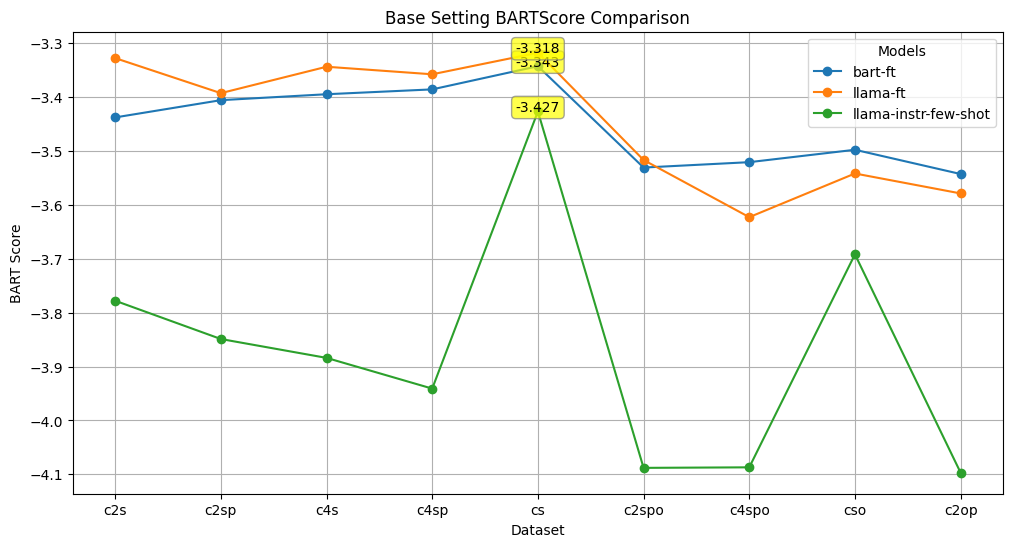

In [36]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='base-bartscore',
    title="Base Setting BARTScore Comparison"
)

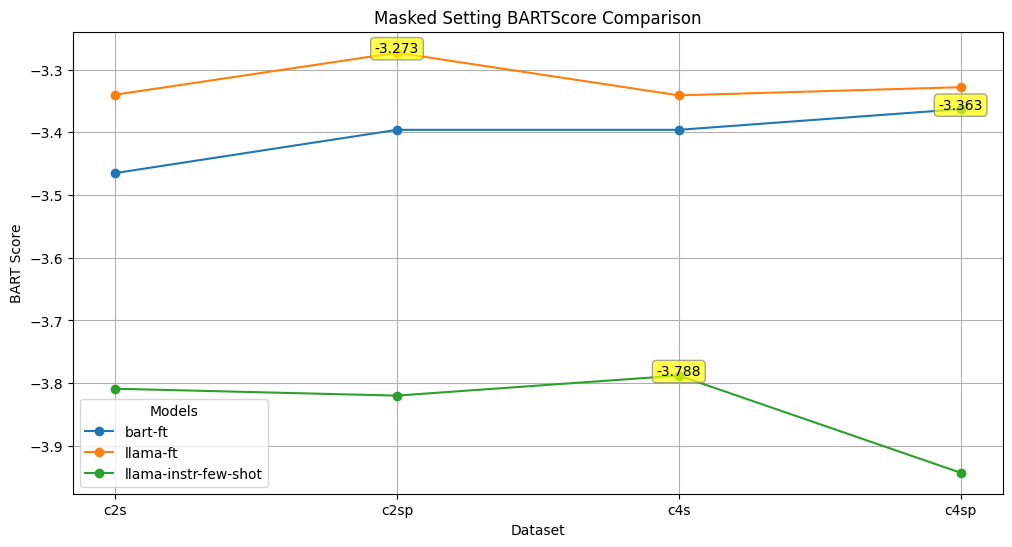

In [16]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='masked-bartscore',
    title="Masked Setting BARTScore Comparison"
)

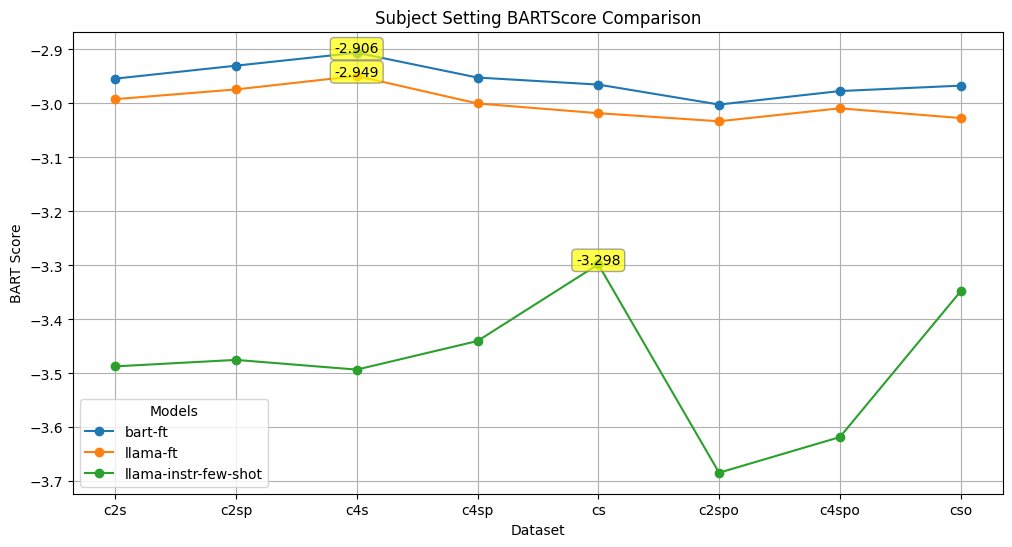

In [17]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='subject-bartscore',
    title="Subject Setting BARTScore Comparison"
)

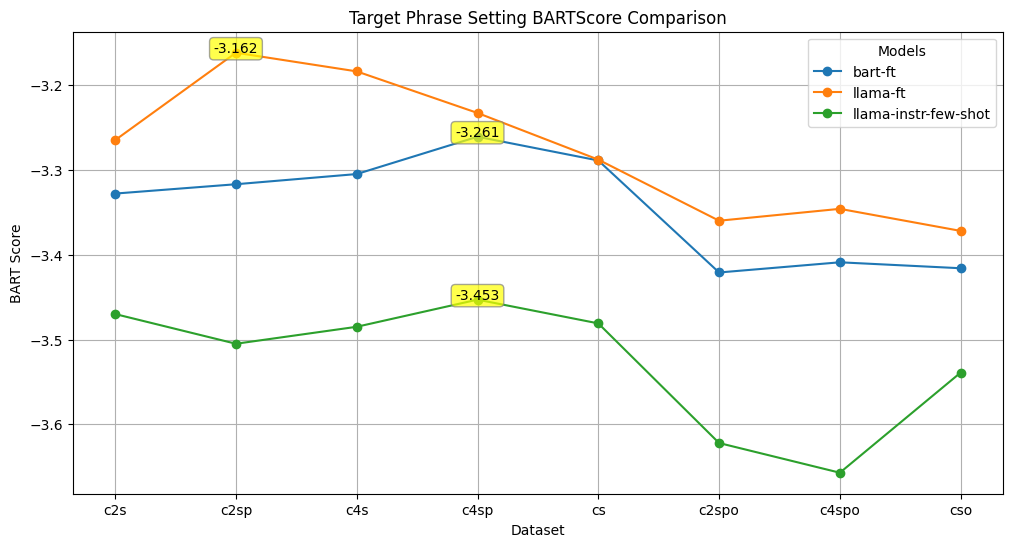

In [18]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-phrase-bartscore',
    title="Target Phrase Setting BARTScore Comparison"
)

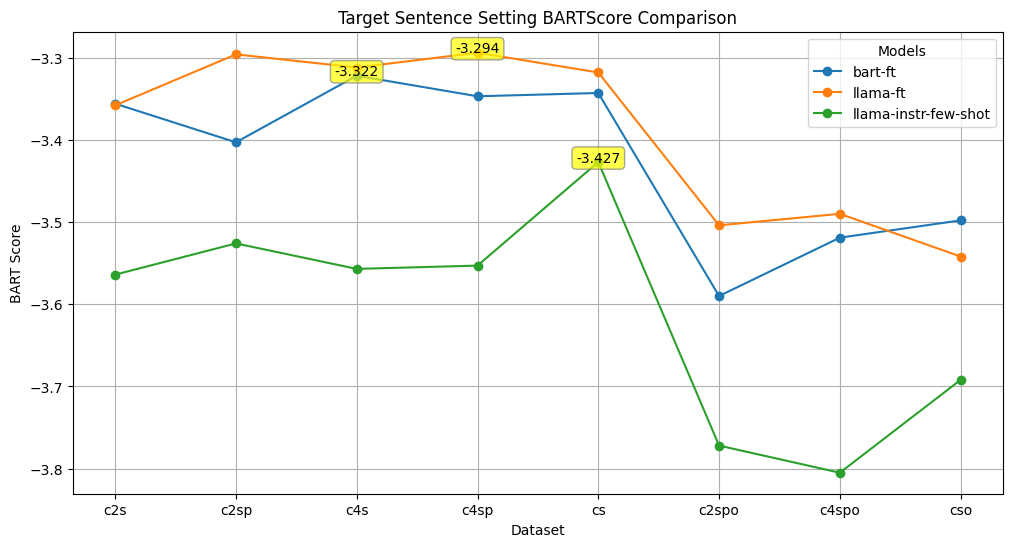

In [19]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-bartscore',
    title="Target Sentence Setting BARTScore Comparison"
)

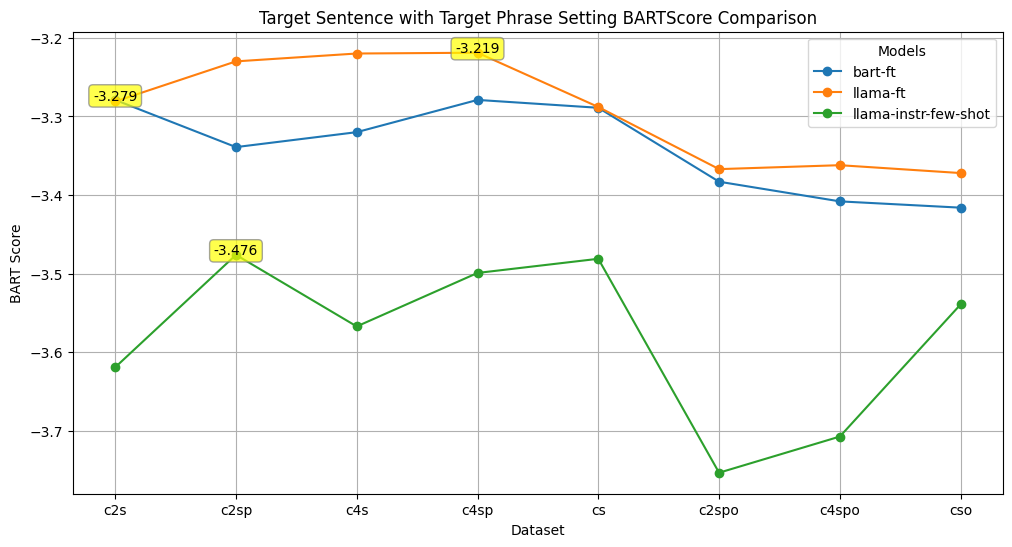

In [20]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-target-bartscore',
    title="Target Sentence with Target Phrase Setting BARTScore Comparison"
)

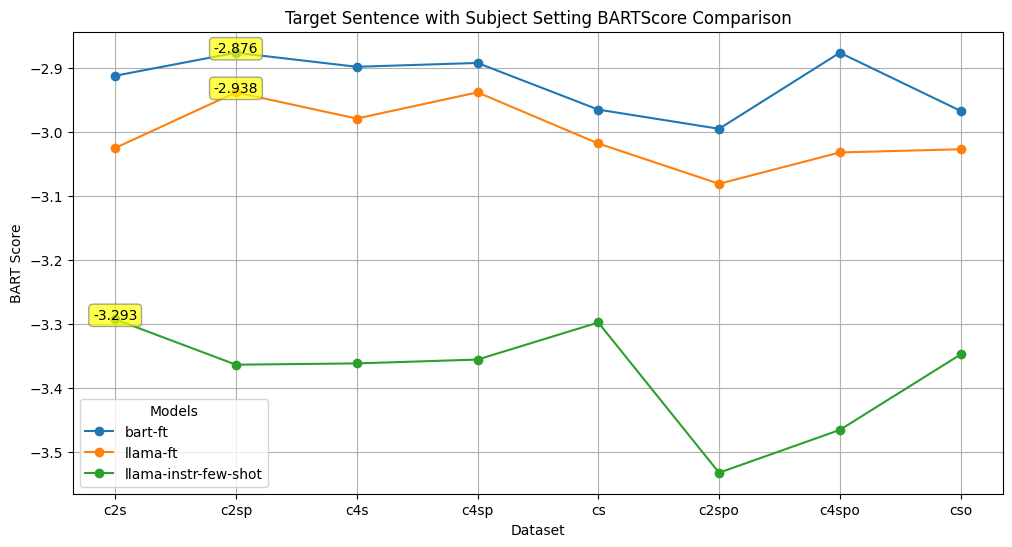

In [49]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-subject-bartscore',
    title="Target Sentence with Subject Setting BARTScore Comparison"
)

# Prompt evaluation

In [30]:
df = llama_instr_prompt_res

## BLEU-1

In [31]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "b1", "llama-instr")
find_max_value(df_filtered)

Highest score: 17.205
Dataset: c2s
Column: llama-instr_long-valid-b1


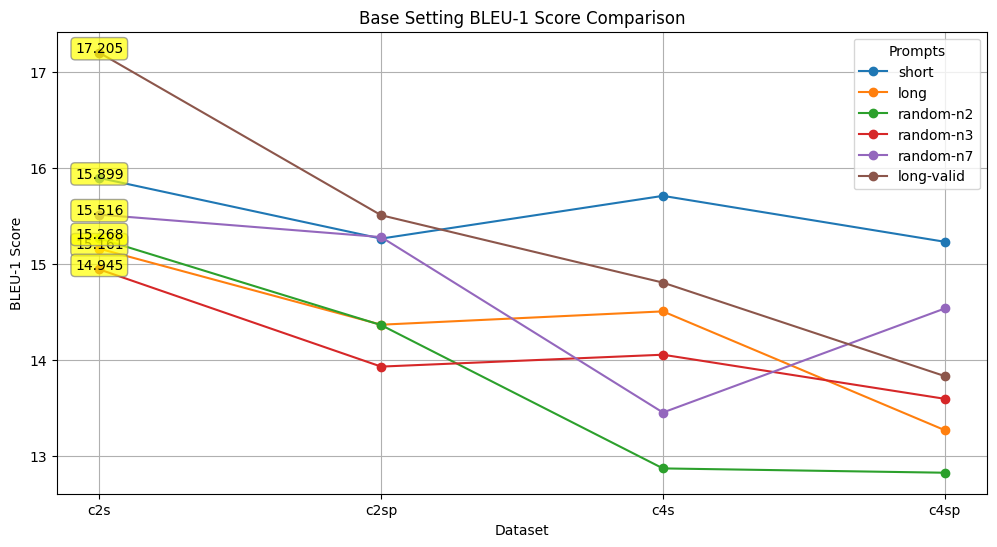

In [32]:
compare_prompt_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='b1',
    title="Base Setting BLEU-1 Score Comparison"
)

## BLEU-2

In [33]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "b2", "llama-instr")
find_max_value(df_filtered)

Highest score: 5.256
Dataset: c2s
Column: llama-instr_long-valid-b2


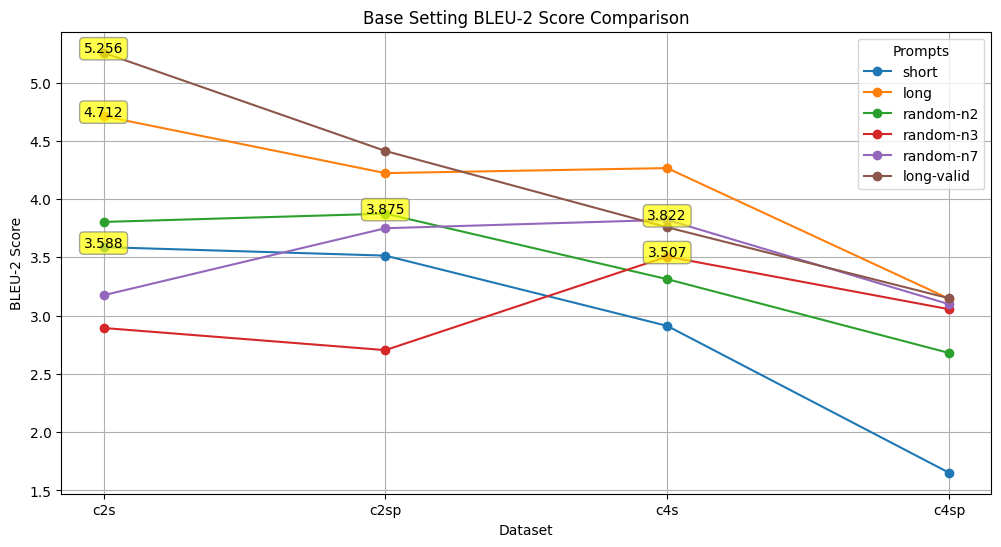

In [34]:
compare_prompt_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='b2',
    title="Base Setting BLEU-2 Score Comparison"
)

## BERTScore

In [35]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "bsf1", "llama-instr")
find_max_value(df_filtered)

Highest score: 0.475
Dataset: c2s
Column: llama-instr_short-bsf1


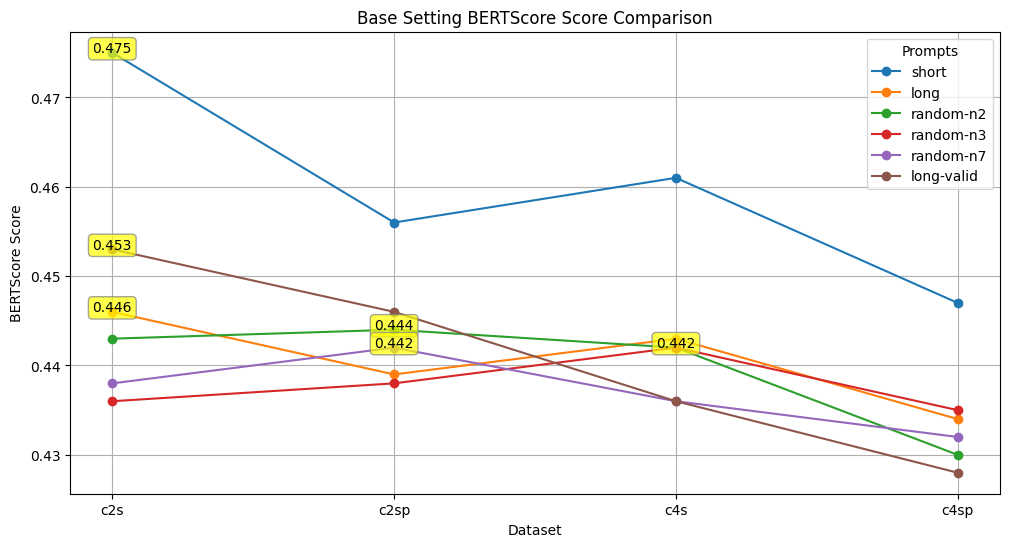

In [36]:
compare_prompt_setting(
    dataframe=df,
    score_type="BERTScore",
    dataset_column='dataset',
    column_type='bsf1',
    title="Base Setting BERTScore Score Comparison"
)

## BARTScore

In [37]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "bartscore", "llama-instr")
find_max_value(df_filtered)

Highest score: -3.778
Dataset: c2s
Column: llama-instr_short-bartscore


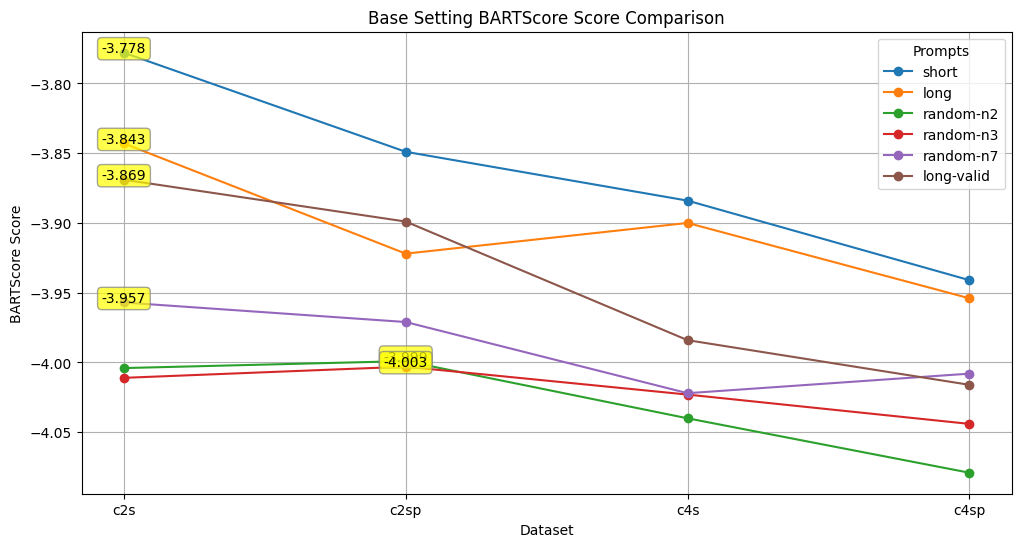

In [38]:
compare_prompt_setting(
    dataframe=df,
    score_type="BARTScore",
    dataset_column='dataset',
    column_type='bartscore',
    title="Base Setting BARTScore Score Comparison"
)